## *Classification of edible and non edible mushrooms*

DataSet : https://www.kaggle.com/datasets/uciml/mushroom-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/173 mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


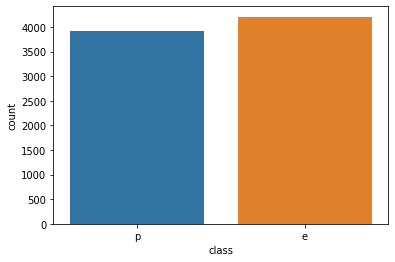

In [4]:
sns.countplot(data = df, x = 'class')

In [5]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
X = df.drop('class',axis = 1)

In [7]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

getting dummies for feeding data into the trees

In [9]:
X = pd.get_dummies(X,drop_first = True)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [10]:
y = df['class']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## AdaBoostClassifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 1)

In [13]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [27]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [15]:
predictions = model.predict(X_test)

In [16]:
predictions

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87      1378
           p       0.82      0.97      0.89      1303

    accuracy                           0.88      2681
   macro avg       0.89      0.88      0.88      2681
weighted avg       0.89      0.88      0.88      2681



In [21]:
model.feature_importances_.argmax()

22

In [22]:
X.columns[22]

'odor_n'

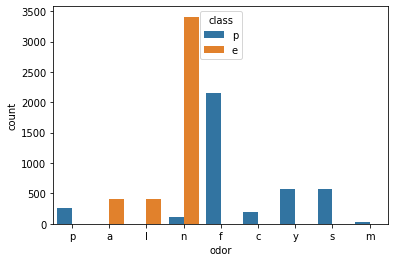

In [24]:
sns.countplot(data = df, x = 'odor',hue = 'class')

In [25]:
len(X.columns)

95

In [28]:
error_rates = []
for n in range(1,96):
    model = AdaBoostClassifier(n_estimators = n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)

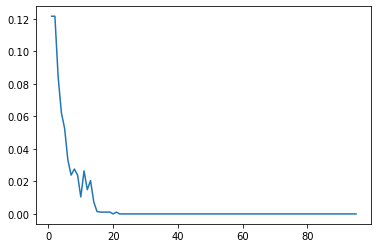

In [29]:
plt.plot(range(1,96), error_rates)

In [32]:
feats = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Importance'])
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.021053
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


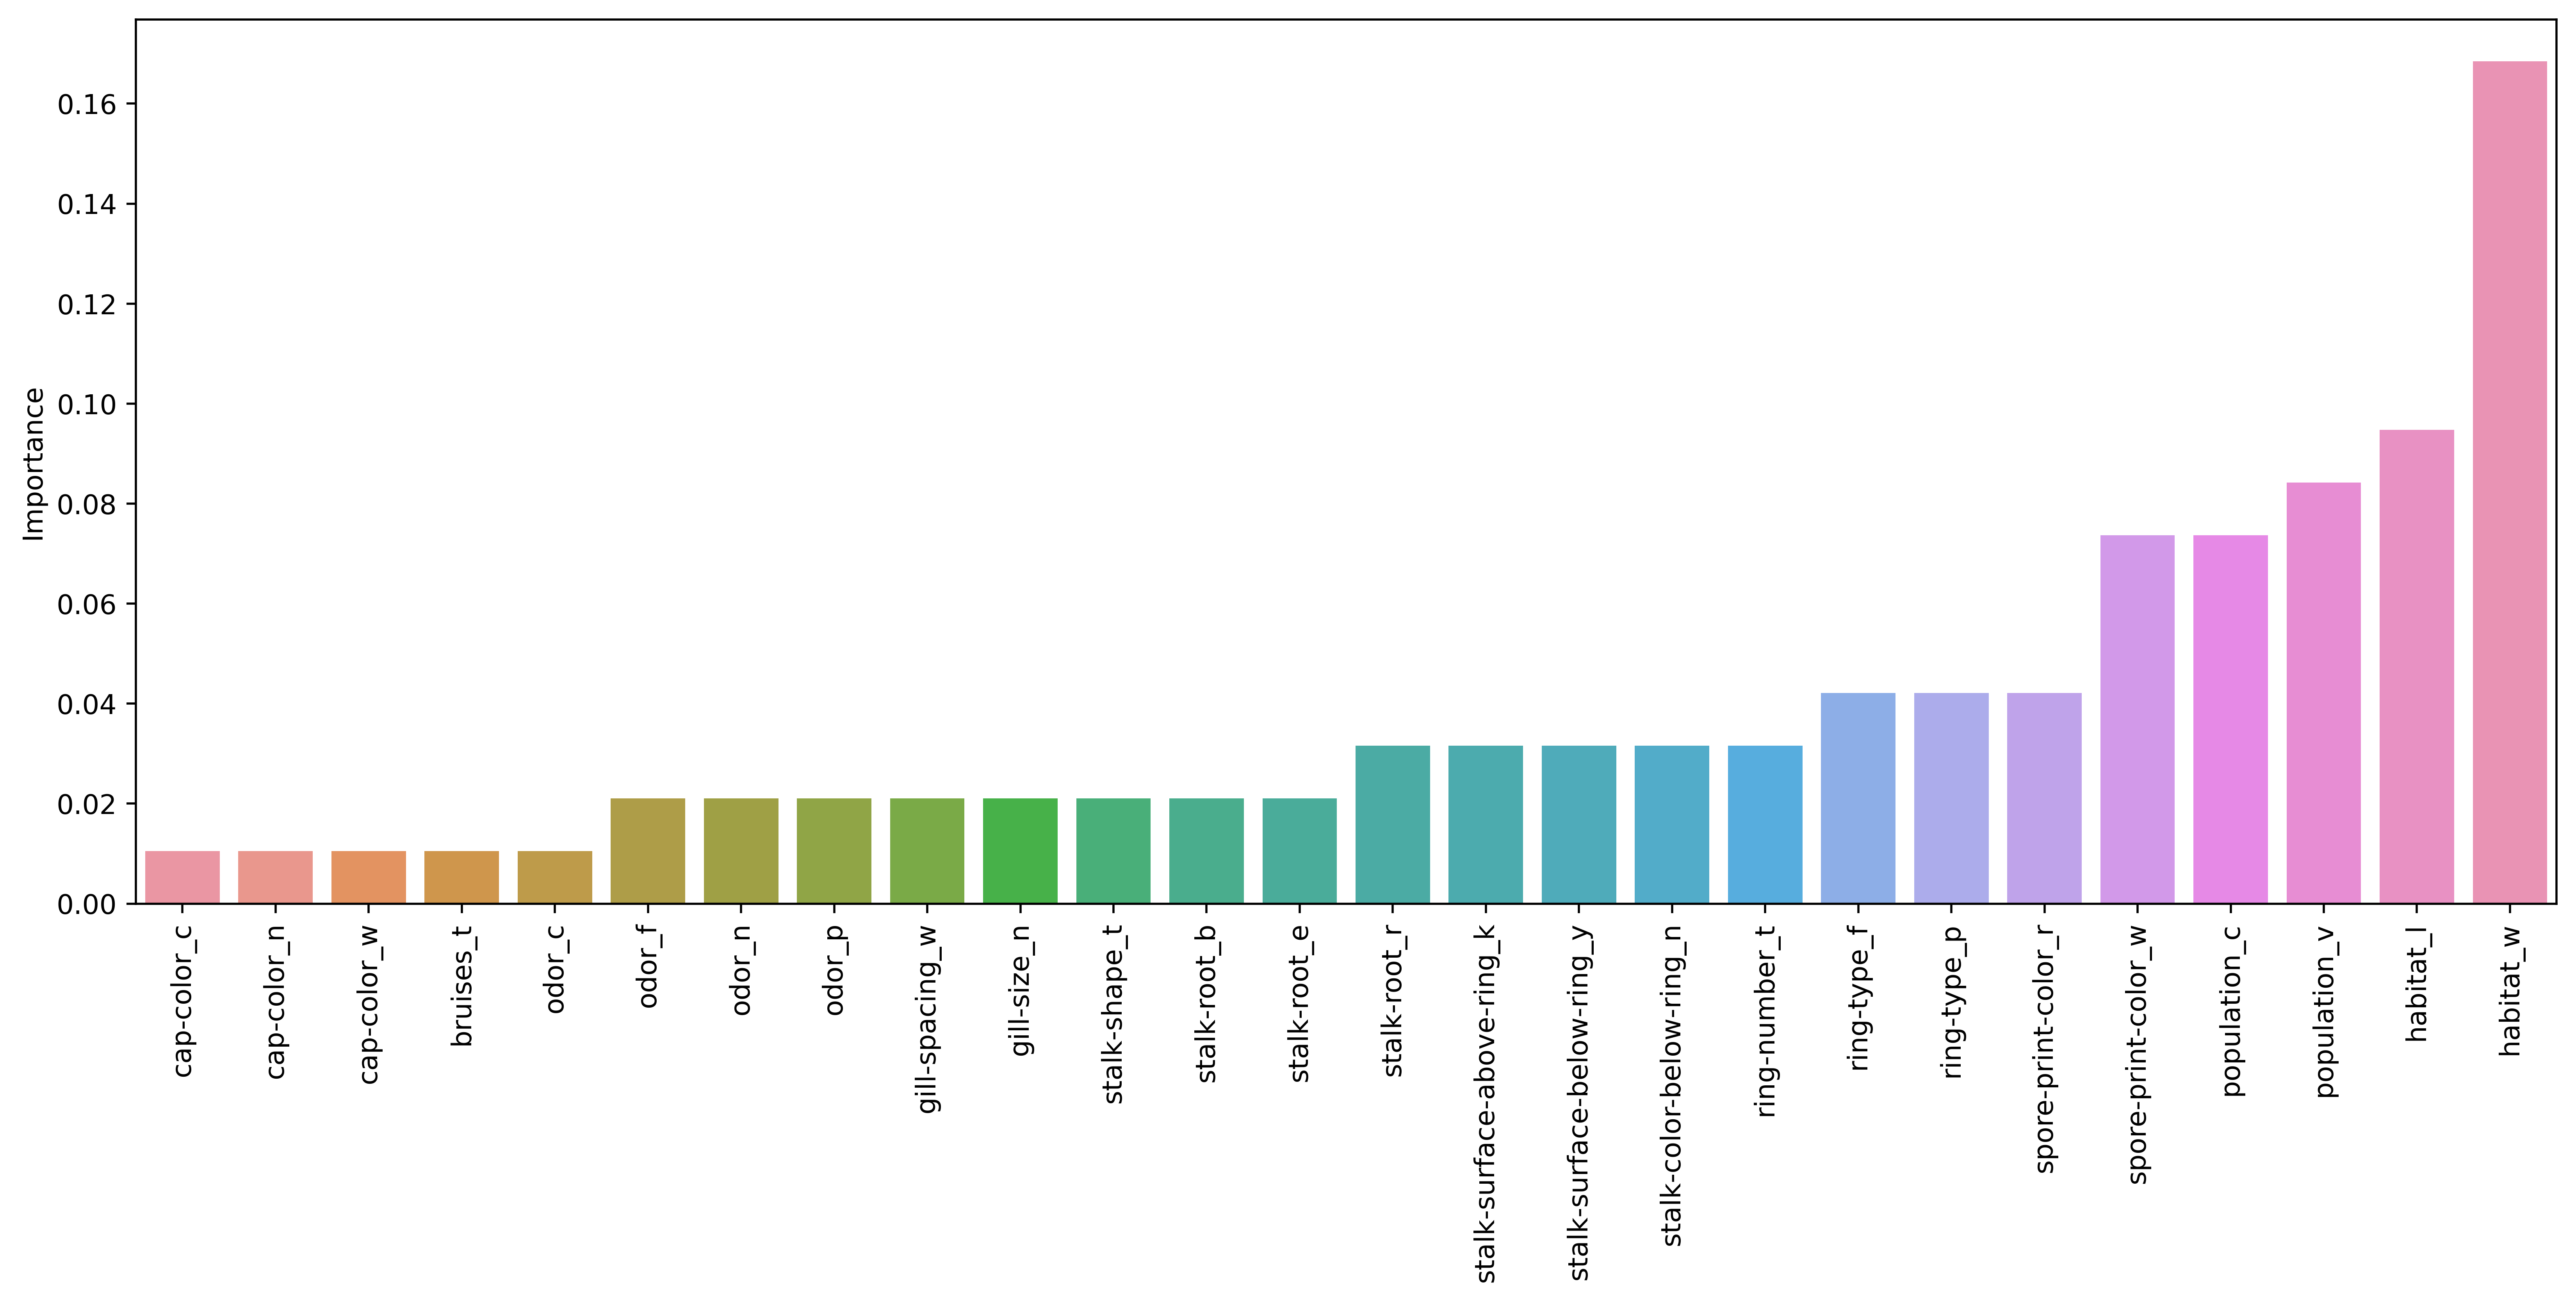

In [37]:
imp_feats = feats[feats['Importance']>0]
plt.figure(figsize = (16,6), dpi = 500)
sns.barplot(data = imp_feats.sort_values('Importance'), x = imp_feats.index, y = 'Importance')
plt.xticks(rotation = 90);

## Gradient Boosting 

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.1,0.05,0.2],
    'max_depth':[3,4,5]
}


In [42]:
gb_model = GradientBoostingClassifier()

In [43]:
grid = GridSearchCV(gb_model,param_grid)

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [46]:
predictions = grid.predict(X_test)

In [47]:
predictions

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [50]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1378
           p       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [63]:
feats_import = grid.best_estimator_.feature_importances_

In [64]:
imp_feat = pd.DataFrame(index = X.columns,
                        data = feats_import,
                        columns = ['Importance'])
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [65]:
imp_feat

,Importance
cap-shape_c,0.000641
cap-surface_g,0.000756
cap-color_y,0.004896
bruises_t,0.051734
odor_f,0.016573
odor_l,0.015804
odor_n,0.622589
odor_p,0.006046
gill-spacing_w,0.012256
gill-size_n,0.009518


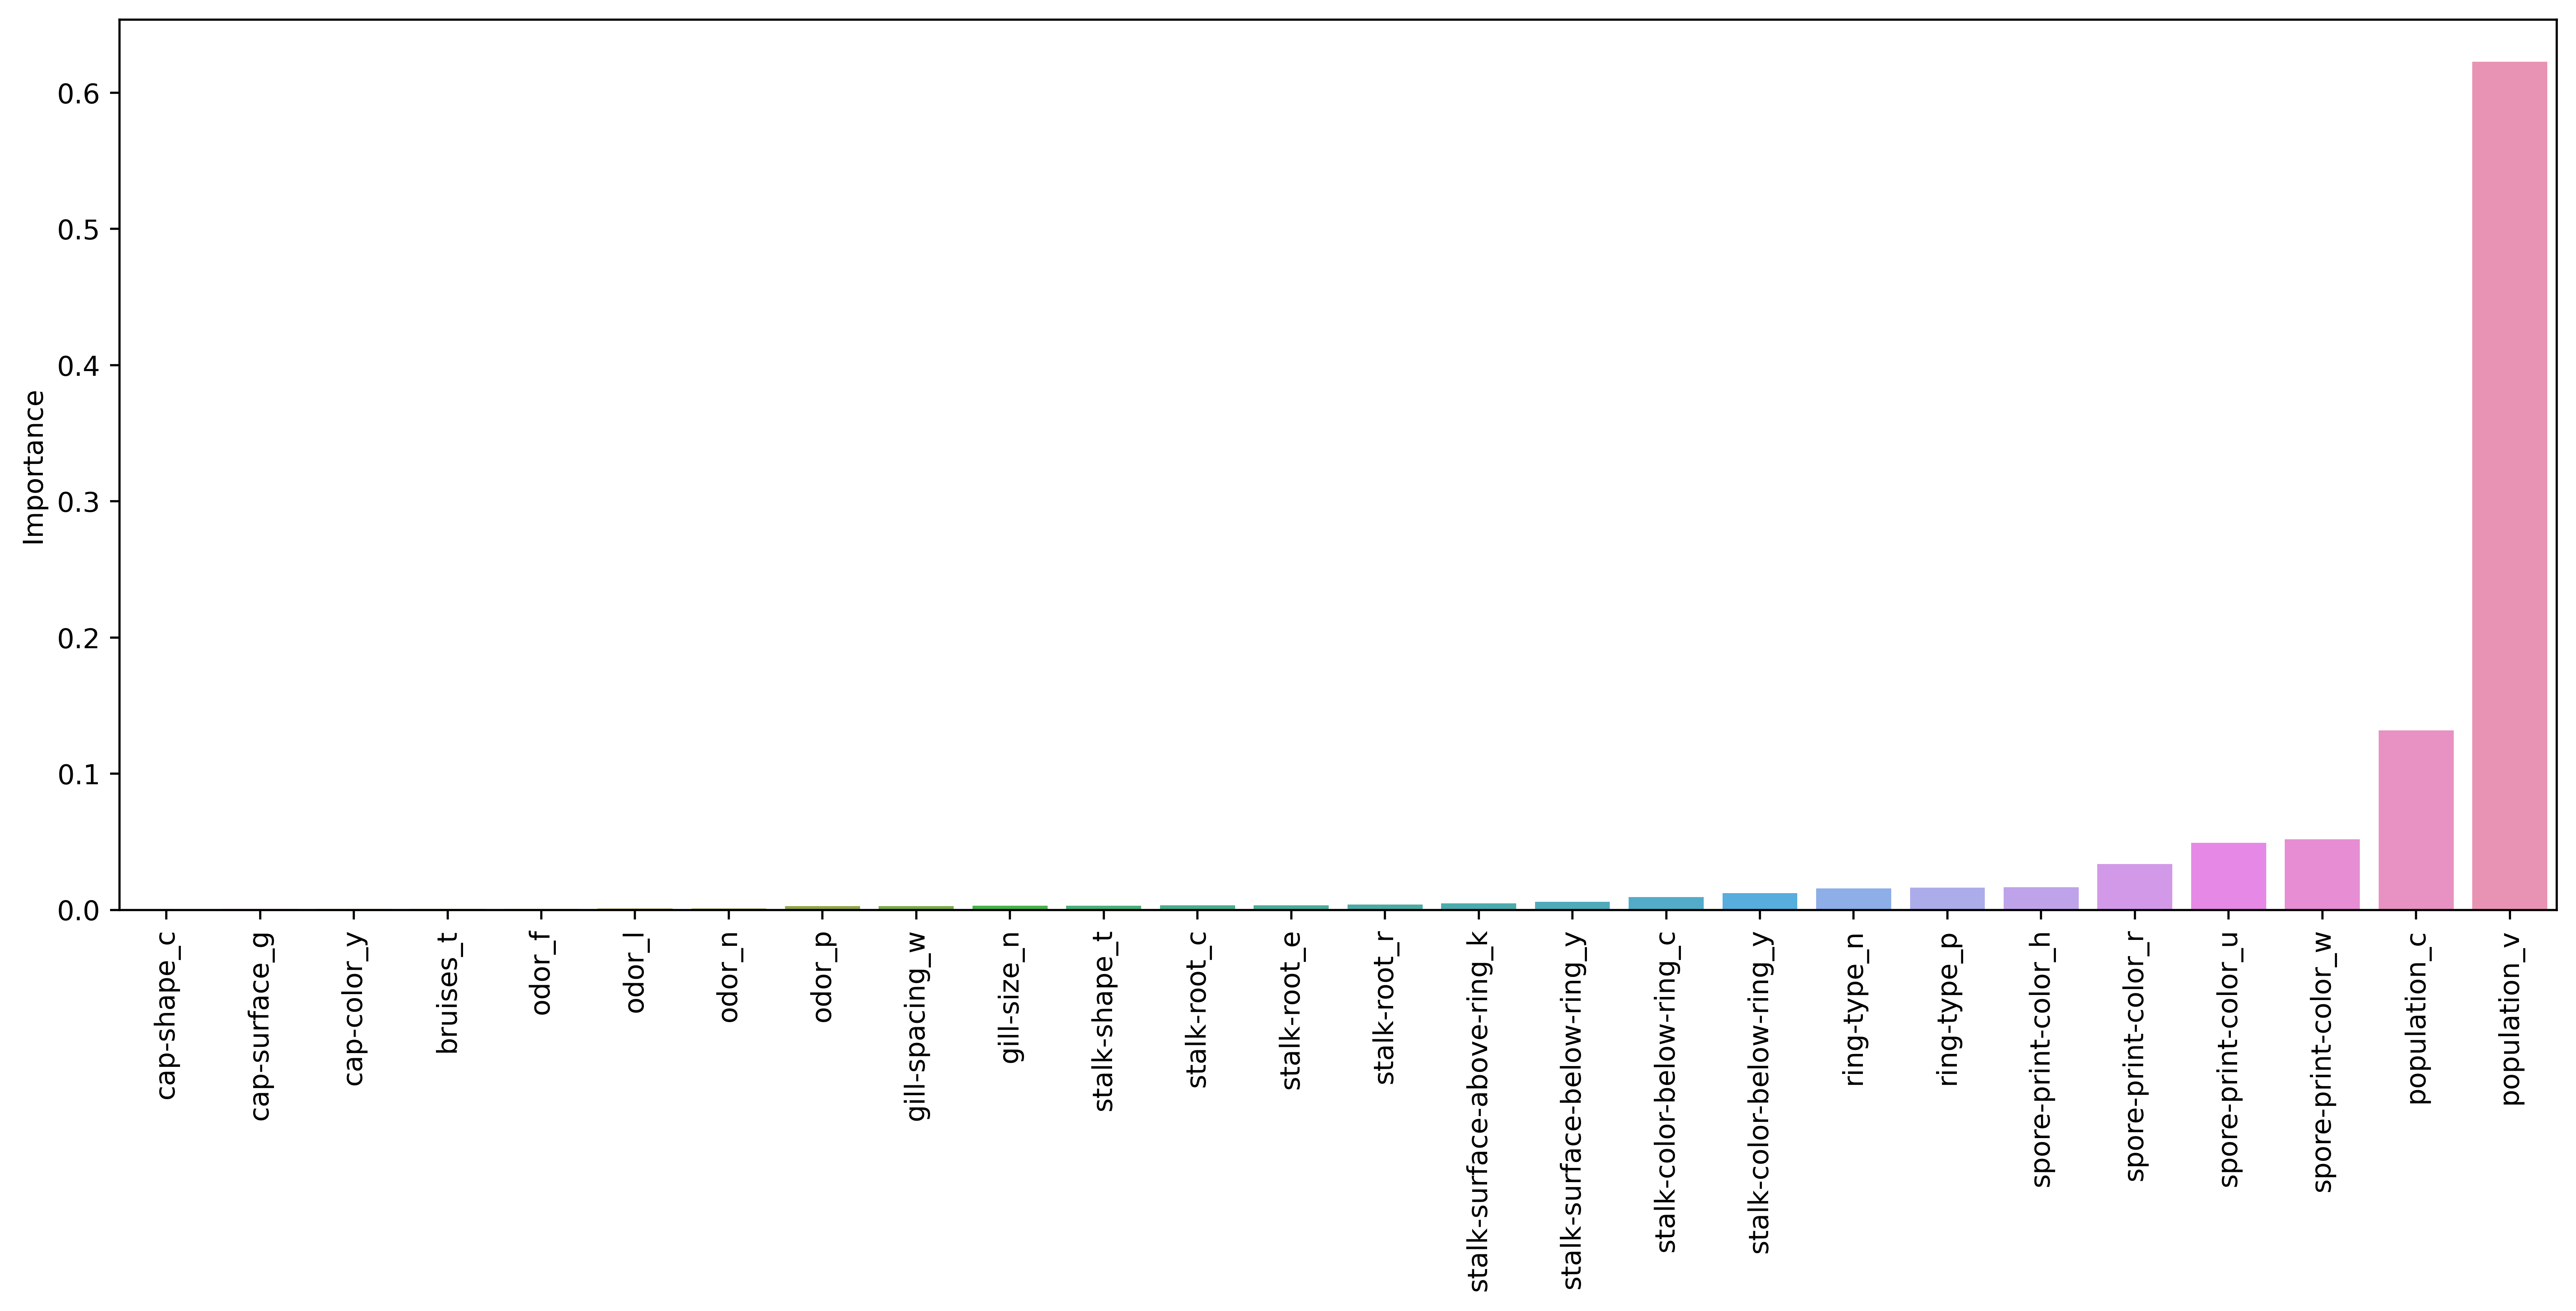

In [67]:
plt.figure(figsize = (16,6), dpi = 500)
sns.barplot(data = imp_feat.sort_values('Importance'), x = imp_feat.index, y = 'Importance')
plt.xticks(rotation = 90);